# MECANISMO CINCO BARRAS 

## PROBLEMAS VELOCIDAD Y ACELERACIÓN

### PASO 1: MATRIZ JACOBIANA 

Para resolver el problema velocidad, necesitamos otra vez la matriz jacobiana. El método de construcción aparece detallado en el notebook Problema_Posición_5B, por lo que para este caso copiaremos el código de los pasos realizados para poder conseguirla.

In [1]:
import numpy as np
import math as math
import array as arr
import pprint  # para depurar
import matplotlib.pyplot as plt  #Para graficas
import matplotlib.animation as animation
import scipy.integrate as integrate 
import os
from time import sleep
#%matplotlib inline (Para notebook)



print ('MECANISMO DE CUATRO BARRAS')
print ('=============================')
# Lectura de datos por teclado

meca = {} # dictionary vacio, con propiedades de mecanismo

meca["L1"] = float (input ('Introduce longitud L1:'))
meca["L2"] = float (input ('Introduce longitud L2:'))
meca["L3"] = float (input ('Introduce longitud L3:'))
meca["L4"] = float (input ('Introduce longitud L4: '))
meca["theta"] = float (input ('Introduce angulo inicial theta:')) #En rad
meca["beta"] = float (input('Introduce angulo inicial beta: ')) #En rad
meca["XB"] = float (input ('Introduce coordenada en x del punto B:'))
meca["XA"] = 0
meca["YA"] = 0
meca["YB"] = 0

# Defino posicion inicial:
q = np.array ([[0.1], [meca["L1"]], [1], [0.2], [2], [0.1], [meca["theta"]], [meca["beta"]]])
print('q: ' + str(q))

# JACOBIANO
def jacob_Phiq(q,meca):
    #Inicializa a cero la matriz jacobiana
    Jacob = np.zeros((8,8))

    #Extraer coordenadas

    X1 = q[0]
    Y1 = q[1]
    X2 = q[2]
    Y2 = q[3]
    X3 = q[4]
    Y3 = q[5]
    theta = q[6]
    beta = q[7]

    #Montar matriz

    Jacob[0,0] = 2*X1
    Jacob[0,1] = 2*Y1
    Jacob[1,0] = -2*(X2-X1)
    Jacob[1,1] = -2*(Y2-Y1)
    Jacob[1,2] = 2*(X2-X1)
    Jacob[1,3] = 2*(Y2-Y1)
    Jacob[2,2] = -2*(X3-X2)
    Jacob[2,3] = -2*(Y3-Y2)
    Jacob[2,4] = 2*(X3-X2)
    Jacob[2,5] = 2*(Y3-Y2)
    Jacob[3,4] = -2*(meca["XB"]-X3)
    Jacob[3,5] = -2*(meca["YB"]-Y3)

    if (abs(math.cos(theta)) < (math.sqrt(2)/2) ):
        Jacob[4,6] = meca["L1"]*math.sin(theta)
        Jacob[4,0] = 1
    else:
        Jacob[4,6] = -meca["L1"]*math.cos(theta)
        Jacob[4,1] = 1


    if ((math.cos(beta)) < (math.sqrt(2)/2) ):
        Jacob[5,7] = meca["L4"]*math.sin(beta)
        Jacob[5,4] = 1
    else:
        Jacob[5,7] = -meca["L4"]*math.cos(beta)
        Jacob[5,5] = 1

    Jacob[6,6] = 1
    Jacob[7,7] = 1

    return Jacob


def Phi (q,meca):
    #Inicializa a cero Phi
    Phi = np.zeros((8,1))

    #Extraer coordenadas
    X1 = q[0]
    Y1 = q[1]
    X2 = q[2]
    Y2 = q[3]
    X3 = q[4]
    Y3 = q[5]
    theta = q[6]
    beta = q[7]
	
    Phi[0] = X1**2 + Y1**2 - meca["L1"]**2
    Phi[1] = (X2-X1)**2 + (Y2-Y1)**2 -meca["L2"]**2
    Phi[2] = (X3-X2)**2 + (Y3-Y2)**2 - meca["L3"]**2
    Phi[3] = (meca["XB"] - X3)**2 + (meca["YB"] - Y3)**2 - meca["L4"]**2

    if (abs(math.cos(theta)) < (math.sqrt(2)/2) ):
        Phi[4] = X1-meca["L1"]*math.cos(theta)
    else: 
        Phi[4] = Y1-meca["L1"]*math.sin(theta)
		
    if (abs(math.cos(beta)) < (math.sqrt(2)/2) ):
        Phi[5] = (X3-meca["XB"])-meca["L4"]*math.cos(beta)
    else: 
        Phi[5] = Y3-meca["L4"]*math.sin(beta)
		
    return Phi



def resuelve_prob_posicion(q_init, meca):
    #Inicializacion de variables
    error = 1e10
    tolerancia = 1e-10

    #Inicializacion en cero de deltaQ, fi y q
    deltaQ = np.zeros ((8,1))
    q = q_init
    i=0

    # Iteraciones hasta conseguir que el error sea menor que la tolerancia

    while (error > tolerancia and i<=100):



        #Extraer las coordenadas
        X1 = q[0]
        Y1 = q[1]
        X2 = q[2]
        Y2 = q[3]
        X3 = q[4]
        Y3 = q[5]
        theta = q[6]
        beta = q[7]
       
        fi=Phi(q,meca)

        J = jacob_Phiq(q,meca)
        
        deltaQ = np.linalg.solve(J,-fi)
        q = q + deltaQ
        error = np.linalg.norm(deltaQ)  # El error es el modulo del vector
        i=i+1

    return q

q = resuelve_prob_posicion (q,meca)
J = jacob_Phiq(q,meca)
print ("Jacob=")
pprint.pprint(J)

MECANISMO DE CUATRO BARRAS
Introduce longitud L1:1
Introduce longitud L2:1
Introduce longitud L3:1
Introduce longitud L4: 1
Introduce angulo inicial theta:1
Introduce angulo inicial beta: 1
Introduce coordenada en x del punto B:2
q: [[0.1]
 [1. ]
 [1. ]
 [0.2]
 [2. ]
 [0.1]
 [1. ]
 [1. ]]
Jacob=
array([[ 1.08060461e+00,  1.68294197e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [-2.00000000e+00,  3.00973781e-08,  2.00000000e+00,
        -3.00973781e-08,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00, -2.00000000e+00,
        -3.00973781e-08,  2.00000000e+00,  3.00973781e-08,
         0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  1.08060461e+00,  1.68294197e+00,
         0.00000000e+00,  0.00000000e+00],
       [ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00,


### PASO 2: PROBLEMA VELOCIDAD

Consiste en determinar las velocidades de todas las variables del mecanismo una vez sabemos su posición $q$ y la velocidad de los grados de libertad. 

Partimos de la ecuación:

$\Phi_q  =0 $

Derivando se obtiene:

$\Phi_q \dot{q} + \Phi_t = 0 $

Siendo $\dot{q}$ el vector velocidad, $\Phi_q$ el jacobiano y $\Phi_t$ la derivada parcial de las ecuaciones de restricción respecto al tiempo. Para las ecuaciones de sólido rígido el valor de esta derivada es $0$. Solo tendría un valor no nulo la correspondiente al ángulo, que en ese caso tendría la velocidad que nosotros le indiquemos. 

En este caso vamos a tomar un valor de $1$. De este modo la expresión quedaría:

$\Phi_q \dot{q} = -\Phi_t$

Habría que multiplicar en ambas partes de la igualdad por la inversa del jacobiano en el lado izquierdo, del mismo modo que se hizo en el problema de posición. De esta manera tendríamos:

$\Phi_q^{-1}  \Phi_q  \dot{q} = \Phi_q^{-1}  (-\Phi_t)$


$ \underbrace{( \Phi_q^{-1}  \Phi_q)}_{= \mathbf{I_n}}  \dot{q} = \Phi_q^{-1} (-\Phi_t)$

$\dot{q} = \Phi_q^{-1} (-\Phi_t)$

In [2]:
# PASO 2

def resuelve_prob_velocidad(q,meca):
    
    b = np.zeros ((8,1))
    #Velocidad del gdl.
    b[6]=0.2
    b[7] = 0.2
    qp = np.linalg.solve(jacob_Phiq(q,meca),b)
 
    return qp

resuelve_prob_velocidad (q,meca)

array([[-0.1682942 ],
       [ 0.10806046],
       [-0.1682942 ],
       [ 0.10806046],
       [-0.1682942 ],
       [ 0.10806046],
       [ 0.2       ],
       [ 0.2       ]])

### PASO 3: PROBLEMA ACELERACIÓN

El problema aceleración trata de determinar las aceleraciones de todas las variables del mecanismo, conociendo la posición $q$, la velocidad $q_p$ y las aceleraciones de los grados de libertad. 

La ecuación de la que partimos es:

$Фq · q_pp = -∂_Фq · q_p$

Siendo Фq el jacobiano, $q_{pp}$ el vector aceleración, $q_p$ el vector velocidad y ∂_Фq la derivada del jacobiano respecto al tiempo. 

Es decir, si llamamos $b$ al conjunto $∂_{Фq} · q_p$ y multiplicando a ambos lados por el lado izquierdo por la inversa del jacobiano, del mismo modo que se hizo en los problemas posición y velocidad, tendríamos como resultado:

$q_{pp} = Фq^{-1}·-b$


El vector velocidad será:

\begin{equation}
\mathbf{q_p} = 
\begin{bmatrix}
X_1q \\
Y_1q \\
X_2q \\
Y_2q \\
X_3q \\
Y_3q \\
θ_q\\
\beta_q \\
\end{bmatrix}
\end{equation}

Por otro lado, para calcular la derivada del jacobiano solo tenemos en cuenta las filas que hacen referencia a las ecuaciones de las coordenadas dependientes, ya que la última que añadimos para poder realizar los cálculos era adicional. Teniendo en cuenta esto, la derivada del jacobiano sería:

\begin{equation}
\mathbf{∂_Фq} = 
\begin{bmatrix}
2X_1q & 2Y_1q & 0 & 0 & 0 & 0 & 0 & 0\\
-2(X_2q-X_1q) & -2(Y_2q-Y_1q) & 2(X_2q-X_1q) & 2(Y_2q-Y_1q) & 0 & 0 & 0 & 0\\
0 & 0 & -2(X_3q-X_2q) & 2(Y_3q-Y_2q) & 2(X_3q-X_2q) & 2(Y_3q-Y_2q) & 0 & 0\\
0 & 0 & 0 & 0 & 2X_3q & 2Y_3q & 0 & 0\\
∂_Фq(4)\\
∂_Фq(5)\\
\end{bmatrix}
\end{equation}

1. $Si ~~ \cos (\theta) < {0.95} \rightarrow ∂_Фq(4) = \theta_q · L_1 · \cos(\theta)$

2. $Si ~~ \cos (\theta) > {0.95} \rightarrow ∂_Фq(4) =  \theta_q · L_1 · \sin(\theta)$

3. $Si ~~ \cos (\beta) < {0.95} \rightarrow ∂_Фq(5) = \beta_q · L_4 · \cos(\beta)$

4. $Si ~~ \cos (\beta) > {0.95} \rightarrow ∂_Фq(5) = \beta_q · L_4 · \sin(\beta)$


Como ya tenemos $∂_Фq$ y $q_p$, podemos calcular $b$. Las dos  últimas filas que añadimos son los valores de las aceleraciones angulares, datos que sabemos de antemano. 

\begin{equation}
\mathbf{b} = 
\begin{bmatrix}
2X_1q^2 & 2Y_1q^2 & 0 & 0 & 0 & 0 & 0 & 0\\
-2X_1q(X_2q-X_1q) & -2Y_1q(Y_2q-Y_1q) & 2X_2q(X_2q-X_1q) & 2Y_2q(Y_2q-Y_1q) & 0 & 0 & 0 & 0\\
0 & 0 & -2X_2q(X_3q-X_2q) & 2Y_2q(Y_3q-Y_2q) & 2X_3q(X_3q-X_2q) & 2Y_3q(Y_3q-Y_2q) & 0 & 0\\
0 & 0 & 0 & 0 & 2X_3q^2 & 2Y_3q^2 & 0 & 0\\
b(4)\\
b(5)\\
1\\
1\\
\end{bmatrix}
\end{equation}

1. $Si ~~ \cos (\theta) < {0.95} \rightarrow b(4) = \theta_q^2 · L_1 · \cos(\theta)$

2. $Si ~~ \cos (\theta) > {0.95} \rightarrow b(4) =  \theta_q^2 · L_1 · \sin(\theta)$

3. $Si ~~ \cos (\beta) < {0.95} \rightarrow b(5) = \beta_q^2 · L_4 · \cos(\beta)$

4. $Si ~~ \cos (\beta) > {0.95} \rightarrow b(5) = \beta_q^2 · L_4 · \sin(\beta)$


In [3]:
#PASO 3

def resuelve_prob_aceleracion (q,meca):

    b=np.zeros ((8,1))
    qp = resuelve_prob_velocidad (q,meca)

    #Extraer las posiciones
    X1 = q[0]
    Y1 = q[1]
    X2 = q[2]
    Y2 = q[3]
    X3 = q[4]
    Y3 = q[5]
    theta = q[6]
    beta = q[7]
    #Extraer las velocidades
    X1q = qp[0]
    Y1q = qp[1]
    X2q = qp[2]
    Y2q = qp[3]
    X3q = qp[4]
    Y3q = qp[5]
    thetaq = qp[6]
    betaq = qp[7]
    
    b[0] = 2*(X1q)**2 + 2*(Y1q)**2
    b[1] = -2*X1q*(X2q-X1q) - 2*Y1q*(Y2q-Y1q) + 2*X2q*(X2q*X1q) + 2*Y2q*(Y2q*Y1q)
    b[2] = -2*X2q*(X3q-X2q) + 2*Y2q*Y3q + 2*X3q*(X3q-X2q) + 2*Y3q*(Y3q-Y2q)
    b[3] = -2*X3q**2 - 2*Y3q**2
    
    if (abs(math.cos(theta)) < (math.sqrt(2)/2) ):
        b[4] = thetaq**2 * (meca["L1"] * math.cos(theta))
    else: 
        b[4] =  thetaq**2 * (meca["L1"] * math.sin(theta))
    
    if (abs(math.cos(beta)) < (math.sqrt(2)/2) ):
        b[5] = betaq**2 * (meca["L4"] * math.cos(beta))
    else: 
        b[5] =  betaq**2 * (meca["L4"] * math.sin(beta))

    b[6] = 1 #Aceleracion conocida 
    b[7] = 1
    qpp = np.linalg.solve(-jacob_Phiq(q,meca),b)

     
    return qpp

resuelve_prob_aceleracion(q, meca)

array([[ 7.79489209e-01],
       [-5.48040069e-01],
       [ 7.87080120e-01],
       [ 2.71528343e+05],
       [ 7.79489209e-01],
       [-4.52968461e-01],
       [-1.00000000e+00],
       [-1.00000000e+00]])

### PASO 4: GRÁFICAS DE VELOCIDADES

Vamos a representar por separado la gráfica de la velocidad en cada coordenada $(X_1, ~ Y_1, ~ X_2, ~ Y_2, ~ X_3 ~ e ~ Y_3)$.


VX1=
array([-0.31148154, -0.30892427, -0.30129445, -0.28871736, -0.27139951,
       -0.24962527, -0.22375218, -0.15636656, -0.1710288 , -0.18288274,
       -0.19173374, -0.19743646, -0.19989727, -0.19907575, -0.1949854 ,
       -0.18769337, -0.17731942, -0.16403387, -0.14805487,  0.23717751,
        0.26105   ,  0.28063603,  0.295614  ,  0.30573797,  0.31084172,
        0.31084142,  0.3057371 ,  0.29561256,  0.28063404,  0.2610475 ,
        0.23717455,  0.14805685,  0.16403555,  0.17732078,  0.18769439,
        0.19498605,  0.19907603,  0.19989717,  0.19743599,  0.19173291,
        0.18288155,  0.17102728,  0.15636473, -0.22375536, -0.24962801,
       -0.27140176, -0.28871908, -0.30129561, -0.30892486, -0.31148154])


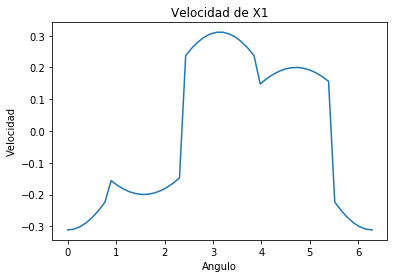

In [4]:
#PASO 4: VELOCIDAD DE X1

def grafica_velocidad(q,meca):
    
    th = np.linspace(0,2*3.1416,50)

    VX1 = np.zeros((50,0))

    
    i=0
    for t in th:

        q[6] = t
        q[7] = t
        
        resuelve_prob_posicion (q,meca)
        qp = resuelve_prob_velocidad (q,meca)

        qp[6] = 1  #inicializar qp en 0 con qp[4] = 1 rad/s
        qp[7] = 1

        resuelve_prob_velocidad(q,meca)
    
        VX1 = np.append(VX1, qp[0])

        i=i+1
      
    print ("VX1=")
    pprint.pprint(VX1)
 
    plt.plot(th,VX1)
    plt.xlabel ('Angulo')
    plt.ylabel ('Velocidad')
    plt.title ('Velocidad de X1')

    plt.show()
    return 

grafica_velocidad (q,meca)

VY1=
array([ 0.2       ,  0.198358  ,  0.19345894,  0.18538328,  0.17426362,
        0.16028255,  0.14366962,  0.10040181,  0.10981633,  0.11742766,
        0.12311082,  0.12677249,  0.12835256,  0.12782507,  0.12519868,
        0.12051653,  0.11385549,  0.10532494,  0.09506494, -0.15228993,
       -0.16761828, -0.18019432, -0.18981157, -0.1963121 , -0.19958917,
       -0.19958898, -0.19631153, -0.18981064, -0.18019305, -0.16761667,
       -0.15228803, -0.09506621, -0.10532601, -0.11385636, -0.12051718,
       -0.1251991 , -0.12782525, -0.1283525 , -0.12677219, -0.12311028,
       -0.1174269 , -0.10981535, -0.10040064,  0.14367166,  0.1602843 ,
        0.17426507,  0.18538439,  0.19345969,  0.19835837,  0.2       ])


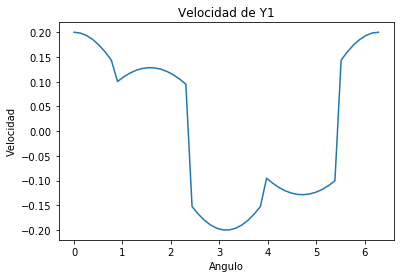

In [5]:
#PASO 4: VELOCIDAD DE Y1

def grafica_velocidad(q,meca):
    
    th = np.linspace(0,2*3.1416,50)

    VY1 = np.zeros((50,0))

    
    i=0
    for t in th:

        q[6] = t
        q[7] = t
        
        resuelve_prob_posicion (q,meca)
        qp = resuelve_prob_velocidad (q,meca)

        qp[6] = 1  #inicializar qp en 0 con qp[4] = 1 rad/s
        qp[7] = 1

        resuelve_prob_velocidad(q,meca)
    
        VY1 = np.append(VY1, qp[1])

        i=i+1
      
    print ("VY1=")
    pprint.pprint(VY1)
 
    plt.plot(th,VY1)
    plt.xlabel ('Angulo')
    plt.ylabel ('Velocidad')
    plt.title ('Velocidad de Y1')

    plt.show()
    return 

grafica_velocidad (q,meca)

VX2=
array([-0.31148154, -0.30892427, -0.30129445, -0.28871736, -0.27139951,
       -0.24962527, -0.22375218, -0.15636656, -0.1710288 , -0.18288274,
       -0.19173374, -0.19743646, -0.19989727, -0.19907575, -0.1949854 ,
       -0.18769337, -0.17731942, -0.16403387, -0.14805487,  0.05376635,
        0.07597201,  0.09693021,  0.1162968 ,  0.1337538 ,  0.14901456,
        0.16182848,  0.17198518,  0.17931787,  0.18370615,  0.18507797,
        0.1834108 ,  0.14805685,  0.16403555,  0.17732078,  0.18769439,
        0.19498605,  0.19907603,  0.19989717,  0.19743599,  0.19173291,
        0.18288155,  0.17102728,  0.15636473, -0.22375536, -0.24962801,
       -0.27140176, -0.28871908, -0.30129561, -0.30892486, -0.31148154])


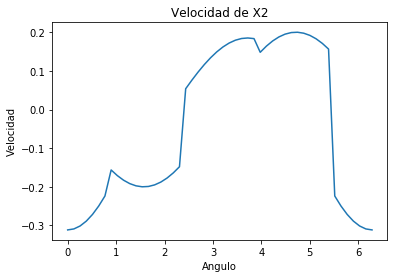

In [6]:
#PASO 4: VELOCIDAD DE X2

def grafica_velocidad(q,meca):
    
    th = np.linspace(0,2*3.1416,50)

    VX2 = np.zeros((50,0))

    
    i=0
    for t in th:

        q[6] = t
        q[7] = t
        
        resuelve_prob_posicion (q,meca)
        qp = resuelve_prob_velocidad (q,meca)

        qp[6] = 1  #inicializar qp en 0 con qp[4] = 1 rad/s
        qp[7] = 1

        resuelve_prob_velocidad(q,meca)
    
        VX2 = np.append(VX2, qp[2])

        i=i+1
      
    print ("VX2=")
    pprint.pprint(VX2)
 
    plt.plot(th,VX2)
    plt.xlabel ('Angulo')
    plt.ylabel ('Velocidad')
    plt.title ('Velocidad de X2')

    plt.show()
    return 

grafica_velocidad (q,meca)

VY2=
array([ 2.00000005e-01,  1.98357999e-01,  1.93458947e-01,  1.85383287e-01,
        1.74263626e-01,  1.60282548e-01,  1.43669623e-01,  1.00401812e-01,
        1.09816330e-01,  1.17427658e-01,  1.23110819e-01,  1.26772495e-01,
        1.28352559e-01,  1.27825067e-01,  1.25198684e-01,  1.20516529e-01,
        1.13855489e-01,  1.05324935e-01,  9.50649406e-02, -1.21878499e+07,
       -1.22986119e+07, -1.22074301e+07, -1.19158018e+07, -1.14285153e+07,
       -1.07535721e+07, -9.90205474e+06, -8.88794513e+06, -7.72789502e+06,
       -6.44095250e+06, -5.04824922e+06, -3.57265345e+06, -9.50662096e-02,
       -1.05326014e-01, -1.13856361e-01, -1.20517181e-01, -1.25199103e-01,
       -1.27825249e-01, -1.28352498e-01, -1.26772193e-01, -1.23110282e-01,
       -1.17426895e-01, -1.09815352e-01, -1.00400636e-01,  1.43671666e-01,
        1.60284306e-01,  1.74265070e-01,  1.85384390e-01,  1.93459691e-01,
        1.98358373e-01,  2.00000005e-01])


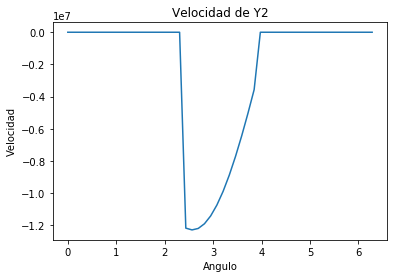

In [7]:
#PASO 4: VELOCIDAD DE Y2

def grafica_velocidad(q,meca):
    
    th = np.linspace(0,2*3.1416,50)

    VY2 = np.zeros((50,0))

    
    i=0
    for t in th:

        q[6] = t
        q[7] = t
        
        resuelve_prob_posicion (q,meca)
        qp = resuelve_prob_velocidad (q,meca)

        qp[6] = 1  #inicializar qp en 0 con qp[4] = 1 rad/s
        qp[7] = 1

        resuelve_prob_velocidad(q,meca)
    
        VY2 = np.append(VY2, qp[3])

        i=i+1
      
    print ("VY2=")
    pprint.pprint(VY2)
 
    plt.plot(th,VY2)
    plt.xlabel ('Angulo')
    plt.ylabel ('Velocidad')
    plt.title ('Velocidad de Y2')

    plt.show()
    return 

grafica_velocidad (q,meca)

VX3=
array([-0.31148154, -0.30892427, -0.30129445, -0.28871736, -0.27139951,
       -0.24962527, -0.22375218, -0.15636656, -0.1710288 , -0.18288274,
       -0.19173374, -0.19743646, -0.19989727, -0.19907575, -0.1949854 ,
       -0.18769337, -0.17731942, -0.16403387, -0.14805487, -0.12964481,
       -0.10910598, -0.08677561, -0.06302039, -0.03823037, -0.01281261,
        0.01281554,  0.03823326,  0.06302318,  0.08677826,  0.10910844,
        0.12964705,  0.14805685,  0.16403555,  0.17732078,  0.18769439,
        0.19498605,  0.19907603,  0.19989717,  0.19743599,  0.19173291,
        0.18288155,  0.17102728,  0.15636473, -0.22375536, -0.24962801,
       -0.27140176, -0.28871908, -0.30129561, -0.30892486, -0.31148154])


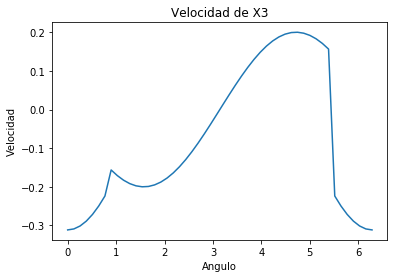

In [8]:
#PASO 4: VELOCIDAD DE X3

def grafica_velocidad(q,meca):
    
    th = np.linspace(0,2*3.1416,50)

    VX3 = np.zeros((50,0))

    
    i=0
    for t in th:

        q[6] = t
        q[7] = t
        
        resuelve_prob_posicion (q,meca)
        qp = resuelve_prob_velocidad (q,meca)

        qp[6] = 1  #inicializar qp en 0 con qp[4] = 1 rad/s
        qp[7] = 1

        resuelve_prob_velocidad(q,meca)
    
        VX3 = np.append(VX3, qp[4])

        i=i+1
      
    print ("VX3=")
    pprint.pprint(VX3)
 
    plt.plot(th,VX3)
    plt.xlabel ('Angulo')
    plt.ylabel ('Velocidad')
    plt.title ('Velocidad de X3')

    plt.show()
    return 

grafica_velocidad (q,meca)

VY3=
array([ 0.2       ,  0.198358  ,  0.19345894,  0.18538328,  0.17426362,
        0.16028255,  0.14366962,  0.10040181,  0.10981633,  0.11742766,
        0.12311082,  0.12677249,  0.12835256,  0.12782507,  0.12519868,
        0.12051653,  0.11385549,  0.10532494,  0.09506494,  0.08324398,
        0.07005614,  0.05571798,  0.04046493,  0.02454744,  0.00822688,
       -0.00822876, -0.02454929, -0.04046672, -0.05571968, -0.07005772,
       -0.08324541, -0.09506621, -0.10532601, -0.11385636, -0.12051718,
       -0.1251991 , -0.12782525, -0.1283525 , -0.12677219, -0.12311028,
       -0.1174269 , -0.10981535, -0.10040064,  0.14367166,  0.1602843 ,
        0.17426507,  0.18538439,  0.19345969,  0.19835837,  0.2       ])


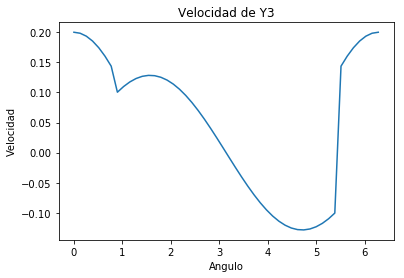

In [9]:
#PASO 4: VELOCIDAD DE Y3

def grafica_velocidad(q,meca):
    
    th = np.linspace(0,2*3.1416,50)

    VY3 = np.zeros((50,0))

    
    i=0
    for t in th:

        q[6] = t
        q[7] = t
        
        resuelve_prob_posicion (q,meca)
        qp = resuelve_prob_velocidad (q,meca)

        qp[6] = 1  #inicializar qp en 0 con qp[4] = 1 rad/s
        qp[7] = 1

        resuelve_prob_velocidad(q,meca)
    
        VY3 = np.append(VY3, qp[5])

        i=i+1
      
    print ("VY3=")
    pprint.pprint(VY3)
 
    plt.plot(th,VY3)
    plt.xlabel ('Angulo')
    plt.ylabel ('Velocidad')
    plt.title ('Velocidad de Y3')

    plt.show()
    return 

grafica_velocidad (q,meca)

### PASO 5: GRÁFICAS ACELERACIONES

Haremos el mismo procedimiento que para la velocidad, representando en celdas separadas la aceleración de cada coordenada.

AX1=
array([ 1.30380756,  1.29466098,  1.26721818,  1.22148001,  1.15748068,
        1.07533405,  0.97529306,  0.72610898,  0.7916874 ,  0.84439107,
        0.88356013,  0.90871386,  0.91954796,  0.91593244,  0.89791059,
        0.86569939,  0.81969103,  0.76045545,  0.68874315, -1.25390624,
       -1.38671874, -1.50195311, -1.59374999, -1.65820311, -1.68359374,
       -1.68359374, -1.65429686, -1.59179686, -1.50341796, -1.38671874,
       -1.24975585, -0.73259371, -0.8142783 , -0.88258239, -0.93616225,
       -0.9739526 , -0.99519621, -0.99946531, -0.98667374, -0.95707945,
       -0.91127712, -0.85018126, -0.77500061,  0.97530554,  1.07534449,
        1.15748906,  1.2214863 ,  1.26722237,  1.29466308,  1.30380756])


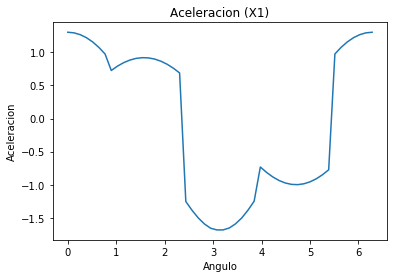

In [10]:
#PASO 5: ACELERACION DE X1

def grafica_aceleracion(q,meca):
    
    th = np.linspace(0,2*3.1416,50)
    AX1 = np.zeros((50,0))

    
    i=0
    for t in th:

        q[6] = t
        q[7] = t
        
        resuelve_prob_posicion (q,meca)
        qpp = resuelve_prob_aceleracion(q,meca)

        qpp[6] = 1  #inicializar qp en 0 con qpp[6] = 1 rad/s**2
        qpp[7] = 1

        resuelve_prob_aceleracion(q,meca)
        
        
        AX1 = np.append(AX1, qpp[0])

        i=i+1
      
    print ("AX1=")
    pprint.pprint(AX1)	
 
    plt.plot(th,AX1)
    plt.xlabel ('Angulo')
    plt.ylabel ('Aceleracion')
    plt.title ('Aceleracion (X1)')	

    plt.show()
    return 

grafica_aceleracion (q,meca)


AY1=
array([-1.        , -0.99146427, -0.96602928, -0.92420672, -0.8668332 ,
       -0.79504671, -0.71025513, -0.50726571, -0.5574298 , -0.59831153,
       -0.62902665, -0.64890249, -0.65750001, -0.6546284 , -0.64035147,
       -0.61498545, -0.57908854, -0.53344238, -0.47902674,  0.70909121,
        0.77524211,  0.83210867,  0.87620927,  0.90754391,  0.91914933,
        0.91798879,  0.90522283,  0.87504873,  0.83297908,  0.77611252,
        0.70793067,  0.43360218,  0.4776816 ,  0.51392784,  0.54197596,
        0.56155764,  0.572493  ,  0.5746843 ,  0.5681122 ,  0.55283497,
        0.52899078,  0.49680282,  0.45658663, -0.71026553, -0.79505571,
       -0.86684063, -0.92421243, -0.96603315, -0.99146622, -1.        ])


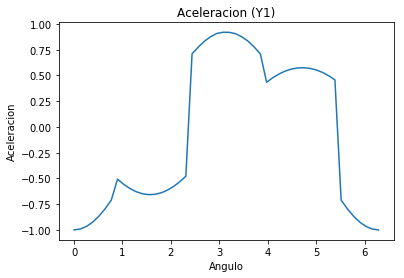

In [11]:
#PASO 5: ACELERACION DE Y1

def grafica_aceleracion(q,meca):
    
    th = np.linspace(0,2*3.1416,50)
    
    AY1 = np.zeros((50,0))

    
    i=0
    for t in th:

        q[6] = t
        q[7] = t
        
        resuelve_prob_posicion (q,meca)
        qpp = resuelve_prob_aceleracion(q,meca)

        qpp[6] = 1  #inicializar qp en 0 con qpp[6] = 1 rad/s**2
        qpp[7] = 1

        resuelve_prob_aceleracion(q,meca)
        
        
        AY1 = np.append(AY1, qpp[1])

        i=i+1
      
    print ("AY1=")
    pprint.pprint(AY1)	
 
    plt.plot(th,AY1)
    plt.xlabel ('Angulo')
    plt.ylabel ('Aceleracion')
    plt.title ('Aceleracion (Y1)')	

    plt.show()
    return 

grafica_aceleracion (q,meca)

AX2=
array([ 1.58851781e+00,  1.57462575e+00,  1.53326993e+00,  1.46539805e+00,
        1.37254596e+00,  1.25677569e+00,  1.12059565e+00,  7.32554810e-01,
        7.99556406e-01,  8.53534434e-01,  8.93729559e-01,  9.19578948e-01,
        9.30721727e-01,  9.27002579e-01,  9.08473329e-01,  8.75392410e-01,
        8.28222261e-01,  7.67624762e-01,  6.94454952e-01,  1.13108546e+13,
        1.26766238e+13,  1.34264016e+13,  1.34753250e+13,  1.28202570e+13,
        1.15401784e+13,  9.78491953e+12,  7.75387148e+12,  5.66778073e+12,
        3.73773312e+12,  2.13584080e+12,  9.71891230e+11, -7.29268095e-01,
       -8.10354196e-01, -8.78150492e-01, -9.31330993e-01, -9.68840594e-01,
       -9.89927091e-01, -9.94164693e-01, -9.81467576e-01, -9.52092637e-01,
       -9.06631274e-01, -8.45990705e-01, -7.71365988e-01,  1.12061232e+00,
        1.25679017e+00,  1.37255795e+00,  1.46540730e+00,  1.53327621e+00,
        1.57462892e+00,  1.58851781e+00])


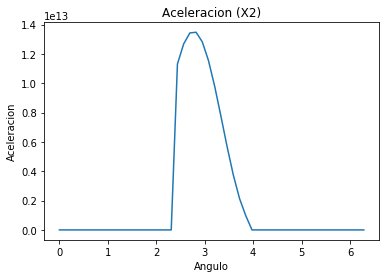

In [12]:
#PASO 5: ACELERACION DE X2

def grafica_aceleracion(q,meca):
    
    th = np.linspace(0,2*3.1416,50)
    
    AX2 = np.zeros((50,0))

    
    i=0
    for t in th:

        q[6] = t
        q[7] = t
        
        resuelve_prob_posicion (q,meca)
        qpp = resuelve_prob_aceleracion(q,meca)

        qpp[6] = 1  #inicializar qp en 0 con qpp[6] = 1 rad/s**2
        qpp[7] = 1

        resuelve_prob_aceleracion(q,meca)
        
        
        AX2 = np.append(AX2, qpp[2])

        i=i+1
      
    print ("AX2=")
    pprint.pprint(AX2)	
 
    plt.plot(th,AX2)
    plt.xlabel ('Angulo')
    plt.ylabel ('Aceleracion')
    plt.title ('Aceleracion (X2)')	

    plt.show()
    return 

grafica_aceleracion (q,meca)

AY2=
array([ 1.74427194e+07,  1.71634469e+07,  1.63430303e+07,  1.50326893e+07,
        1.33145554e+07,  1.12969654e+07,  9.10816188e+06,  2.41528419e+05,
        2.78470008e+05,  3.08723392e+05,  3.31380208e+05,  3.45955067e+05,
        3.52230413e+05,  3.50136621e+05,  3.39695258e+05,  3.21038415e+05,
        2.94499575e+05,  2.60755455e+05,  2.20984865e+05, -7.51617270e+20,
       -8.42373959e+20, -8.92197420e+20, -8.95448433e+20, -8.51918525e+20,
       -7.66856061e+20, -6.50217403e+20, -5.15252288e+20, -3.76629532e+20,
       -2.48375995e+20, -1.41928695e+20, -6.45831158e+19,  3.79566571e+05,
        4.76418798e+05,  5.66918942e+05,  6.44118910e+05,  7.01909811e+05,
        7.35624676e+05,  7.42507345e+05,  7.21992289e+05,  6.75762313e+05,
        6.07577168e+05,  5.22893513e+05,  4.28321085e+05,  9.10841719e+06,
        1.12972090e+07,  1.33147717e+07,  1.50328646e+07,  1.63431537e+07,
        1.71635106e+07,  1.74427194e+07])


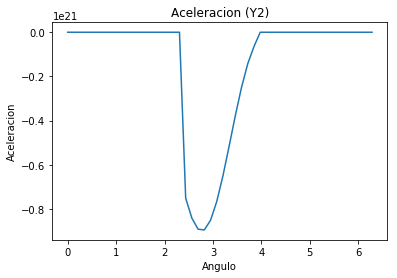

In [13]:
#PASO 5: ACELERACION DE Y2

def grafica_aceleracion(q,meca):
    
    th = np.linspace(0,2*3.1416,50)
    
    AY2 = np.zeros((50,0))

    
    i=0
    for t in th:

        q[6] = t
        q[7] = t
        
        resuelve_prob_posicion (q,meca)
        qpp = resuelve_prob_aceleracion(q,meca)

        qpp[6] = 1  #inicializar qp en 0 con qpp[6] = 1 rad/s**2
        qpp[7] = 1

        resuelve_prob_aceleracion(q,meca)
        
        
        AY2 = np.append(AY2, qpp[3])

        i=i+1
      
    print ("AY2=")
    pprint.pprint(AY2)	
 
    plt.plot(th,AY2)
    plt.xlabel ('Angulo')
    plt.ylabel ('Aceleracion')
    plt.title ('Aceleracion (Y2)')	

    plt.show()
    return 

grafica_aceleracion (q,meca)

AX3=
array([ 1.81100789,  1.79356724,  1.74178476,  1.65725337,  1.54254476,
        1.40108973,  1.2370206 ,  0.72610898,  0.7916874 ,  0.84439107,
        0.88356013,  0.90871386,  0.91954796,  0.91593244,  0.89791059,
        0.86569939,  0.81969103,  0.76045545,  0.68874315,  0.61083651,
        0.50709836,  0.39473471,  0.27550223,  0.15128686,  0.02407752,
       -0.10406321, -0.23103126, -0.35471558, -0.4730346 , -0.58397361,
       -0.68562265, -0.73259371, -0.8142783 , -0.88258239, -0.93616225,
       -0.9739526 , -0.99519621, -0.99946531, -0.98667374, -0.95707945,
       -0.91127712, -0.85018126, -0.77500061,  1.23704052,  1.40110731,
        1.54255951,  1.65726484,  1.74179261,  1.79357123,  1.81100789])


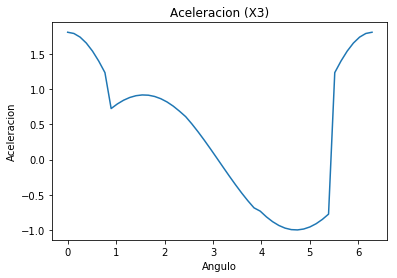

In [14]:
#PASO 5: ACELERACION DE X3

def grafica_aceleracion(q,meca):
    
    th = np.linspace(0,2*3.1416,50)
    
    AX3 = np.zeros((50,0))

    
    i=0
    for t in th:

        q[6] = t
        q[7] = t
        
        resuelve_prob_posicion (q,meca)
        qpp = resuelve_prob_aceleracion(q,meca)

        qpp[6] = 1  #inicializar qp en 0 con qpp[6] = 1 rad/s**2
        qpp[7] = 1

        resuelve_prob_aceleracion(q,meca)
        
        
        AX3 = np.append(AX3, qpp[4])

        i=i+1
      
    print ("AX3=")
    pprint.pprint(AX3)	
 
    plt.plot(th,AX3)
    plt.xlabel ('Angulo')
    plt.ylabel ('Aceleracion')
    plt.title ('Aceleracion (X3)')	

    plt.show()
    return 

grafica_aceleracion (q,meca)

AY3=
array([-1.        , -0.99146427, -0.96602928, -0.92420672, -0.8668332 ,
       -0.79504671, -0.71025513, -0.42519271, -0.45924346, -0.48604301,
       -0.50562822, -0.51805443, -0.5233699 , -0.5215985 , -0.51273206,
       -0.49673292, -0.47354658, -0.44312328, -0.40544704, -0.36400428,
       -0.30562484, -0.24081825, -0.17023227, -0.09468717, -0.01518448,
        0.06709387,  0.15079684,  0.23442653,  0.31637078,  0.39494531,
        0.46844355,  0.50718384,  0.56800256,  0.61947142,  0.66022977,
        0.6891779 ,  0.70552328,  0.70881428,  0.69895964,  0.67623233,
        0.64125784,  0.59498741,  0.53865771, -0.71026553, -0.79505571,
       -0.86684063, -0.92421243, -0.96603315, -0.99146622, -1.        ])


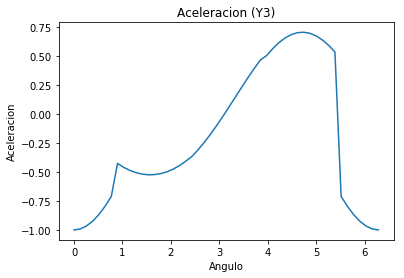

In [15]:
#PASO 5: ACELERACION DE Y3

def grafica_aceleracion(q,meca):
    
    th = np.linspace(0,2*3.1416,50)
    
    AY3 = np.zeros((50,0))

    
    i=0
    for t in th:

        q[6] = t
        q[7] = t
        
        resuelve_prob_posicion (q,meca)
        qpp = resuelve_prob_aceleracion(q,meca)

        qpp[6] = 1  #inicializar qp en 0 con qpp[6] = 1 rad/s**2
        qpp[7] = 1

        resuelve_prob_aceleracion(q,meca)
        
        
        AY3 = np.append(AY3, qpp[5])

        i=i+1
      
    print ("AY3=")
    pprint.pprint(AY3)	
 
    plt.plot(th,AY3)
    plt.xlabel ('Angulo')
    plt.ylabel ('Aceleracion')
    plt.title ('Aceleracion (Y3)')	

    plt.show()
    return 

grafica_aceleracion (q,meca)